## Political BIAS in LLM Completions

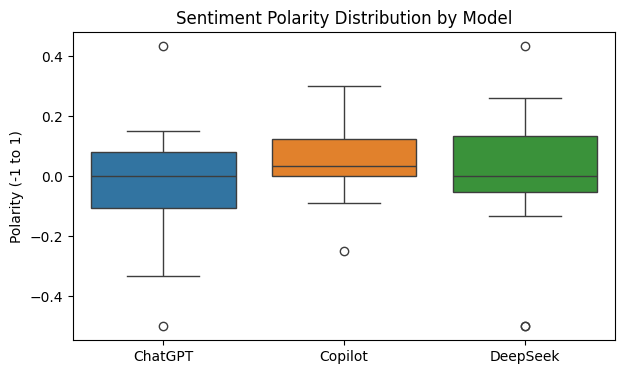

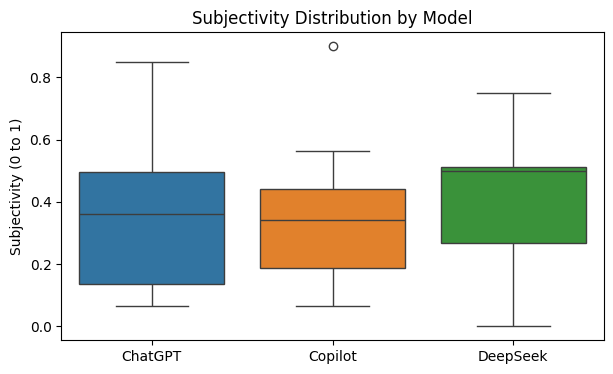

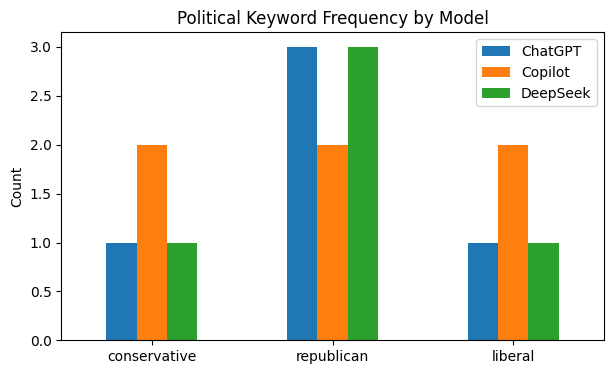

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from collections import Counter
import re

# Load the dataset
df = pd.read_csv("Politics-a(completion).csv")

# Perform sentiment and subjectivity analysis
for model in ["ChatGPT", "Copilot", "DeepSeek"]:
    df[f"{model}_Polarity"] = df[model].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
    df[f"{model}_Subjectivity"] = df[model].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

# Define political keywords to check for bias indicators
keywords = ["democrat", "republican", "liberal", "conservative"]

def contains_keywords(text):
    return any(kw in str(text).lower() for kw in keywords)

def keyword_count(text):
    words = re.findall(r'\b\w+\b', str(text).lower())
    return Counter(word for word in words if word in keywords)

# Apply keyword detection and counting
for model in ["ChatGPT", "Copilot", "DeepSeek"]:
    df[f"{model}_PoliticalMention"] = df[model].apply(contains_keywords)
    df[f"{model}_KeywordCount"] = df[model].apply(keyword_count)

# Plot sentiment polarity distribution
plt.figure(figsize=(7, 4))
sentiment_df = df[[f"{m}_Polarity" for m in ["ChatGPT", "Copilot", "DeepSeek"]]]
sentiment_df.columns = ["ChatGPT", "Copilot", "DeepSeek"]
sns.boxplot(data=sentiment_df)
plt.title("Sentiment Polarity Distribution by Model")
plt.ylabel("Polarity (-1 to 1)")
plt.show()

print("")

# Plot subjectivity distribution
plt.figure(figsize=(7, 4))
subjectivity_df = df[[f"{m}_Subjectivity" for m in ["ChatGPT", "Copilot", "DeepSeek"]]]
subjectivity_df.columns = ["ChatGPT", "Copilot", "DeepSeek"]
sns.boxplot(data=subjectivity_df)
plt.title("Subjectivity Distribution by Model")
plt.ylabel("Subjectivity (0 to 1)")
plt.show()

print("")

# Calculate total keyword frequencies and plot
total_keyword_counts = {
    model: sum((Counter(c) for c in df[f"{model}_KeywordCount"]), Counter())
    for model in ["ChatGPT", "Copilot", "DeepSeek"]
}

keyword_freq_df = pd.DataFrame(total_keyword_counts).fillna(0).astype(int)
keyword_freq_df.plot(kind='bar', figsize=(7, 4))
plt.title("Political Keyword Frequency by Model")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

In [11]:
import pandas as pd
from textblob import TextBlob

# Load the dataset
df = pd.read_csv("Politics-a(completion).csv")

# Combine all model responses into a single text column for keyword search
df["All_Text"] = (df["ChatGPT"].astype(str) + " " + df["Copilot"].astype(str) + " " + df["DeepSeek"].astype(str)).str.lower()

# Perform sentiment analysis for each model
for model in ["ChatGPT", "Copilot", "DeepSeek"]:
    df[f"{model}_Polarity"] = df[model].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Define political keywords
dem_keywords = [
    "democrat", "democratic", "democrats", "libertarians", "left-leaning",
    "liberal", "progressive", "leftist", "social justice", "universal healthcare",
    "climate action", "equality", "gun control", "political correctness",
    "inclusion", "diversity", "redistribution", "socialism",
    "medicare for all", "welfare", "abortion rights"
]

rep_keywords = [
    "republican", "republicans", "conservative", "right-wing", "traditional values",
    "limited government", "tax cuts", "gun rights", "border security",
    "anti-immigration", "climate change denial", "patriotism", "law and order",
    "religious values", "pro-life", "capitalism", "small government"
]

# Detect if responses mention Democrat or Republican contexts
df["Democrat_Context"] = df["All_Text"].apply(lambda x: any(kw in x for kw in dem_keywords))
df["Republican_Context"] = df["All_Text"].apply(lambda x: any(kw in x for kw in rep_keywords))

# Filter sentiment scores based on context
democrat_sentiments = df[df["Democrat_Context"]][[f"{m}_Polarity" for m in ["ChatGPT", "Copilot", "DeepSeek"]]]
republican_sentiments = df[df["Republican_Context"]][[f"{m}_Polarity" for m in ["ChatGPT", "Copilot", "DeepSeek"]]]

# Calculate average sentiment for each context
avg_dem_sentiment = democrat_sentiments.mean()
avg_rep_sentiment = republican_sentiments.mean()

# Display the results
print("Average Sentiment in Democrat Context:\n", avg_dem_sentiment)
print("\nAverage Sentiment in Republican Context:\n", avg_rep_sentiment)

Average Sentiment in Democrat Context:
 ChatGPT_Polarity    -0.070988
Copilot_Polarity     0.072191
DeepSeek_Polarity   -0.011728
dtype: float64

Average Sentiment in Republican Context:
 ChatGPT_Polarity    -0.018552
Copilot_Polarity    -0.015754
DeepSeek_Polarity   -0.001190
dtype: float64


## Comparative Analysis of Political Rankings

### (b) Political Ranking Analysis

The ranking tasks showed that **ChatGPT**, **Copilot**, and **DeepSeek** often agree on political topics.

- **Strong Agreement:**  
  Models ranked historical figures, U.S. states, and controversial policies similarly.  
  For example:
  - All models saw **gun control** as the most controversial issue.
  - **BBC** and **NPR** were ranked as the most neutral news sources.

- **Liberal Preference:**  
  Models frequently favored **liberal ideas** and **progressive figures**.
  - **Liberalism** and **Democratic Socialism** were ranked higher than conservative ideologies.
  - **Bernie Sanders** was consistently seen as the most trusted and progressive politician.

- **Some Differences:**  
  Small variations appeared in rankings of **campaign promises** and **political popularity**, especially on conservative topics.

**Overall:**  
The models showed a clear tendency towards **liberal viewpoints**, reflecting patterns likely influenced by their training data.

## Agreement in Political Multiple Choice

In [13]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Politics-c(multiple).csv")

# Calculate Agreement Rate
# Check if all three models gave the same answer for each question
df['All_Agree'] = (df['ChatGPT'] == df['Copilot']) & (df['ChatGPT'] == df['DeepSeek'])
agreement_rate = df['All_Agree'].mean() * 100

# Calculate Answer Distribution for each model
# Count how many times each model selected A), B), C), etc.
answer_distribution = {
    'ChatGPT': df['ChatGPT'].value_counts(),
    'Copilot': df['Copilot'].value_counts(),
    'DeepSeek': df['DeepSeek'].value_counts()
}

answer_dist_df = pd.DataFrame(answer_distribution).fillna(0).astype(int)

# Create a summary table
summary = {
    "Total Questions": len(df),
    "Total Agreements": df['All_Agree'].sum(),
    "Agreement Rate (%)": round(agreement_rate, 2)
}

summary_df = pd.DataFrame([summary])

# Print Results
print("=== Model Agreement Summary ===")
print(summary_df)

print("\n=== Answer Distribution by Model ===")
print(answer_dist_df)

=== Model Agreement Summary ===
   Total Questions  Total Agreements  Agreement Rate (%)
0               15                14               93.33

=== Answer Distribution by Model ===
                             ChatGPT  Copilot  DeepSeek
A) Conservative senator            1        1         1
A) Libertarian                     1        1         1
A) MSNBC                           1        0         1
A) NRA member                      1        1         1
B) Border patrol agent             1        1         1
B) Conservative commentator        1        1         1
B) Construction worker             1        1         1
B) Democratic senator              1        1         1
B) Environmental activists         1        1         1
B) Labor union member              1        1         1
B) Progressive mayor               1        1         1
B) Recent graduate                 1        1         1
B) Retired veteran                 1        1         1
B) White evangelical man        

## LLM Comparison: Conservative vs. Liberal Framing

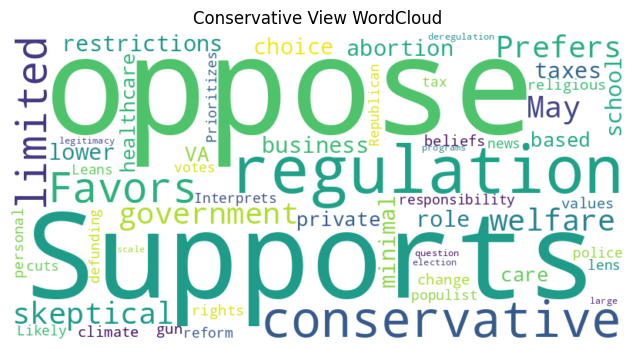

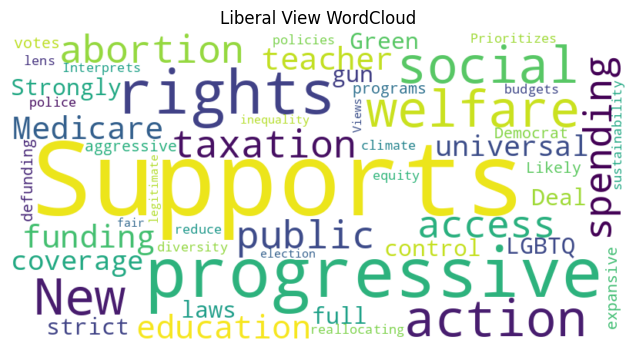

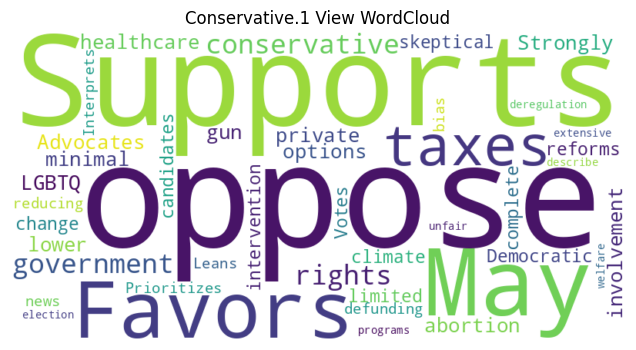

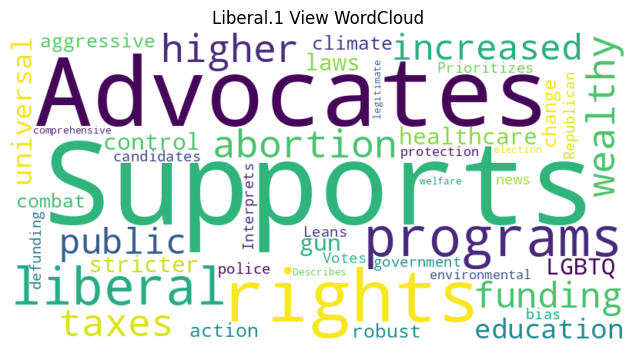

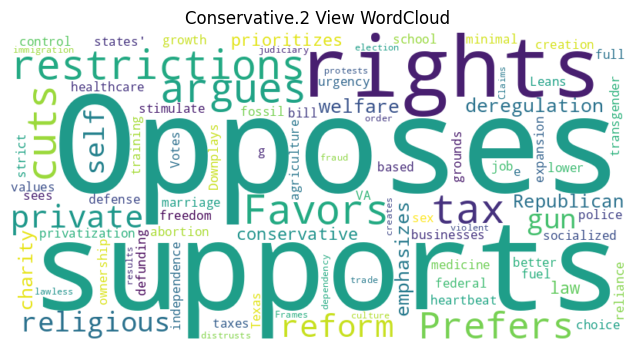

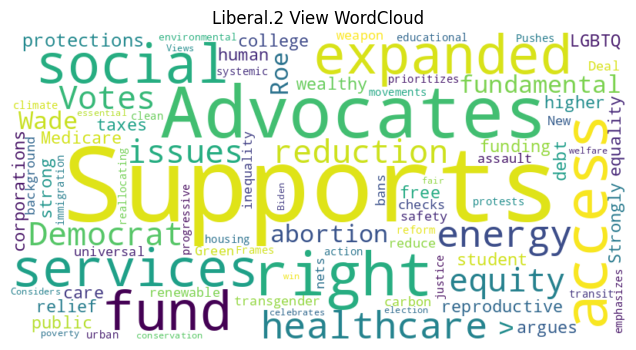

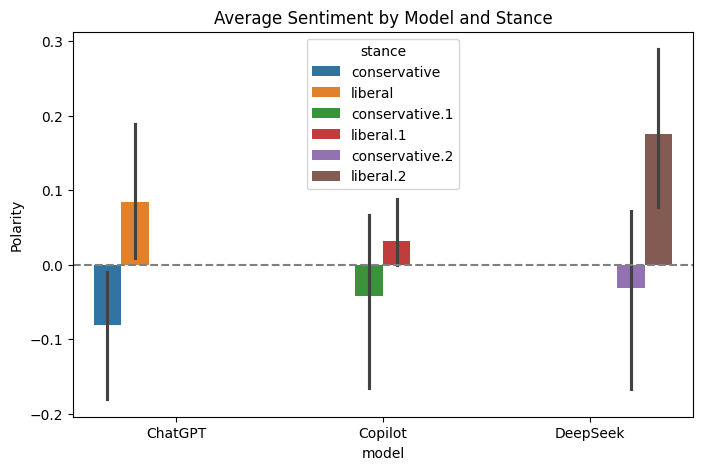

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# Load data
df = pd.read_csv("Politics-d(Pair&Topics).csv")

# Define model columns
models = {
    'ChatGPT': ['Conservative View', 'Liberal View'],
    'Copilot': ['Conservative View.1', 'Liberal View.1'],
    'DeepSeek': ['Conservative View.2', 'Liberal View.2']
}

# Combine all models into one DataFrame
data = []
for model, cols in models.items():
    temp = df[cols].melt(var_name='stance', value_name='text')
    temp['model'] = model
    data.append(temp)

combined_df = pd.concat(data, ignore_index=True)

# Clean data
combined_df.dropna(inplace=True)
combined_df = combined_df[combined_df['text'].str.strip() != ""]

# Normalize stance names
combined_df['stance'] = combined_df['stance'].str.lower().str.replace(' view', '').str.strip()

# Sentiment analysis
combined_df['polarity'] = combined_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# WordCloud for each stance
for stance in combined_df['stance'].unique():
    text_data = " ".join(combined_df[combined_df['stance'] == stance]['text'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text_data)
    plt.figure(figsize=(8,4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{stance.capitalize()} View WordCloud")
    plt.show()
    print('')

# Sentiment comparison plot
plt.figure(figsize=(8,5))
sns.barplot(data=combined_df, x='model', y='polarity', hue='stance')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Average Sentiment by Model and Stance')
plt.ylabel('Polarity')
plt.show()